In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 2021_atles_renda_bruta_llar.csv dataset

In [2]:
renda_raw_df = pd.read_csv(r"Input_Data\2021_atles_renda_bruta_llar.csv")
display(renda_raw_df)

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
0,2021,1,Ciutat Vella,1,el Raval,1,34839
1,2021,1,Ciutat Vella,1,el Raval,2,27777
2,2021,1,Ciutat Vella,1,el Raval,3,31082
3,2021,1,Ciutat Vella,1,el Raval,4,34635
4,2021,1,Ciutat Vella,1,el Raval,5,27950
...,...,...,...,...,...,...,...
1063,2021,10,Sant Martí,73,la Verneda i la Pau,143,40933
1064,2021,10,Sant Martí,65,el Clot,234,47058
1065,2021,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,35643
1066,2021,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,39514


In [3]:
renda_df = renda_raw_df.groupby(['Codi_Districte', 'Nom_Districte', "Codi_Barri", "Nom_Barri"])['Import_Renda_Bruta_€'].mean().reset_index()

columns_rename = {"Codi_Districte": "district_code", "Nom_Districte": "district_name",
                  "Codi_Barri": "neighborhood_code", "Nom_Barri": "neighborhood_name",
                  "Import_Renda_Bruta_€": "gross_income",}
renda_df = renda_df.rename(columns=columns_rename)

display(renda_df.head())

,district_code,district_name,neighborhood_code,neighborhood_name,gross_income
0,1,Ciutat Vella,1,el Raval,32094.666667
1,1,Ciutat Vella,2,el Barri Gòtic,39074.555556
2,1,Ciutat Vella,3,la Barceloneta,33138.636364
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",39499.692308
4,2,L'Eixample,5,el Fort Pienc,54773.950000


## Data preprocessing

In [4]:
# Null-value analysis

for column in renda_df.columns:
    print(f"Null values in {column}: {renda_df[column].isnull().sum()}")

Null values in district_code: 0
Null values in district_name: 0
Null values in neighborhood_code: 0
Null values in neighborhood_name: 0
Null values in gross_income: 0


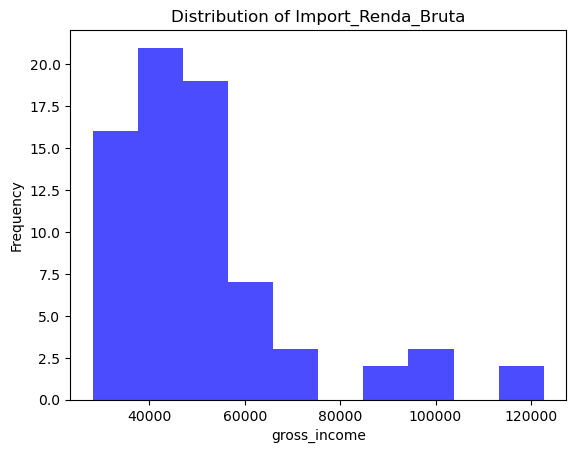

In [5]:
# Distribution of the Import_Renda_Bruta column

plt.hist(renda_df['gross_income'], bins=10, alpha=0.7, color='blue')
plt.xlabel('gross_income')
plt.ylabel('Frequency')
plt.title(f'Distribution of Import_Renda_Bruta')
plt.show()

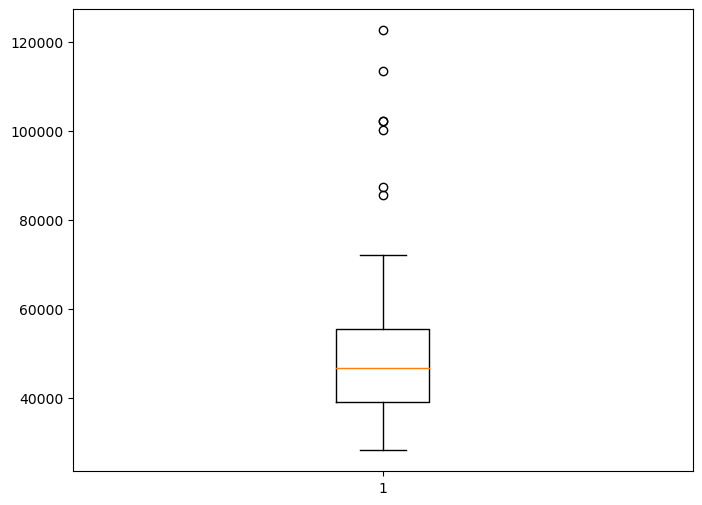

In [6]:
# Outlier detection

plt.figure(figsize=(8, 6))
plt.boxplot(renda_df["gross_income"])
plt.show()

In [7]:


# Calculate IQR
Q1 = renda_df["gross_income"].quantile(0.25)
Q3 = renda_df["gross_income"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = renda_df[(renda_df["gross_income"] < lower_bound) | (renda_df["gross_income"] > upper_bound)]
display(outliers)

,district_code,district_name,neighborhood_code,neighborhood_name,gross_income
20,4,Les Corts,21,Pedralbes,113460.428571
21,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",87476.666667
22,5,Sarrià-Sant Gervasi,23,Sarrià,102317.125000
23,5,Sarrià-Sant Gervasi,24,les Tres Torres,122701.545455
24,5,Sarrià-Sant Gervasi,25,Sant Gervasi- la Bonanova,102198.333333
25,5,Sarrià-Sant Gervasi,26,Sant Gervasi- Galvany,100172.419355
66,10,Sant Martí,67,la Vila Olímpica del Poblenou,85496.200000


See that the _Import_Renda_Bruta_ distribution may vary between neighbourhoods and districts, for this reason performing outlier analysis on the whole population of Barcelona does not result to be significative for our purposes.

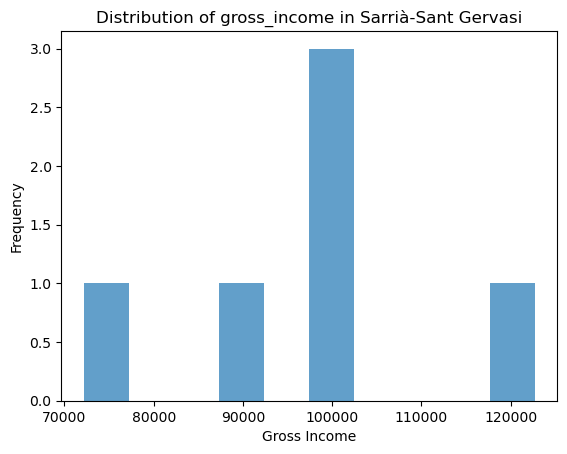

In [8]:
renda_sant_gervasi_df = renda_df[renda_df["district_name"] == "Sarrià-Sant Gervasi"]
plt.hist(renda_sant_gervasi_df["gross_income"], bins=10, alpha=0.7)
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.title(f'Distribution of gross_income in Sarrià-Sant Gervasi')
plt.show()

As shown in the distribution above, the _Import_Renda_Bruta_ in a rich district such as Sarrià-Sant Gervasi signitficantly varies from the overall _Import_Renda_Bruta_ distribution.

## Converting the processed data into a .json file

In [9]:
renda_df.to_json('Input_Data\gross_income.json', orient='records')
renda_df.to_csv('Input_Data\gross_income.csv', index=False)  

# 2020_050067_bbdd_escletxadigital2020-v4.csv dataset

In [10]:
digital_raw_df = pd.read_csv(r"Input_Data\2020_050067_bbdd_escletxadigital2020-v4.csv")
display(digital_raw_df.head())

,ID,METODE,DATA,Codi_Districte,Nom_Districte,F0,F1,F2,RENDA,Q1,...,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR,Longitud,Latitud,Pes
0,5,1,20201015,2,Eixample,3,1,1,3,1,...,1.0,1.0,2.0,1.0,1.0,1.0,8.0,2.156566,41.382082,0.741578
1,6,1,20201015,5,Sarrià - Sant Gervasi,3,1,1,5,2,...,1.0,1.0,2.0,2.0,1.0,1.0,17.0,2.140351,41.405319,0.572459
2,9,1,20201015,7,Horta - Guinardó,3,1,1,2,2,...,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.153140,41.425456,1.740063
3,12,1,20201015,2,Eixample,1,1,1,3,2,...,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.177373,41.406421,0.918977
4,13,1,20201015,1,Ciutat Vella,2,1,1,3,1,...,1.0,2.0,2.0,2.0,2.0,1.0,7.0,2.172285,41.384083,0.923780


In [11]:
selected_columns = ["Codi_Districte", "Nom_Districte", "RENDA", "Q1", "Q2", "ID5", "ID8","P1", "P7",
                    "ID10", "P2_LLAR", "Longitud", "Latitud"]
digital_df = digital_raw_df[selected_columns]
columns_redefinition = {"Codi_Districte": "district_code", "Nom_Districte": "district_name", "RENDA": "income", "Q1": "genre", "Q2": "age", "ID5": "occupation",
                       "ID8": "house_members", "P1": "has_connection", "P7": "has_connection_bcn",
                       "ID10": "level_of_education", "P2_LLAR": "house_devices", "Longitud": "longitude", "Latitud": "latitude"}

digital_df = digital_df.rename(columns=columns_redefinition)

display(digital_df.head())

,district_code,district_name,income,genre,age,occupation,house_members,has_connection,has_connection_bcn,level_of_education,house_devices,longitude,latitude
0,2,Eixample,3,1,64,2,3,1,6,3,8.0,2.156566,41.382082
1,5,Sarrià - Sant Gervasi,5,2,58,1,5,1,0,5,17.0,2.140351,41.405319
2,7,Horta - Guinardó,2,2,60,1,2,1,0,5,4.0,2.153140,41.425456
3,2,Eixample,3,2,78,3,1,1,0,3,3.0,2.177373,41.406421
4,1,Ciutat Vella,3,1,47,1,3,1,0,5,7.0,2.172285,41.384083


## Data preprocessing

In [12]:
# Null-value analysis

for column in digital_df.columns:
    print(f"Nom_Districte ({column}): {digital_df[column].isnull().sum()}")

Nom_Districte (district_code): 0
Nom_Districte (district_name): 0
Nom_Districte (income): 0
Nom_Districte (genre): 0
Nom_Districte (age): 0
Nom_Districte (occupation): 0
Nom_Districte (house_members): 0
Nom_Districte (has_connection): 0
Nom_Districte (has_connection_bcn): 0
Nom_Districte (level_of_education): 0
Nom_Districte (house_devices): 15
Nom_Districte (longitude): 75
Nom_Districte (latitude): 75


In [13]:
# Since the longitud and latitud will be used for location purposes later in the project, we will drop the null values. 
# We will do the same with the null values in the attribute Dispositius_Llar

digital_df.dropna(inplace=True)

for column in digital_df.columns:
    print(f"Nom_Districte ({column}): {digital_df[column].isnull().sum()}")


Nom_Districte (district_code): 0
Nom_Districte (district_name): 0
Nom_Districte (income): 0
Nom_Districte (genre): 0
Nom_Districte (age): 0
Nom_Districte (occupation): 0
Nom_Districte (house_members): 0
Nom_Districte (has_connection): 0
Nom_Districte (has_connection_bcn): 0
Nom_Districte (level_of_education): 0
Nom_Districte (house_devices): 0
Nom_Districte (longitude): 0
Nom_Districte (latitude): 0


## Converting the processed data into a .json file

In [14]:
digital_df.to_json('Input_Data\digital.json', orient='records')
digital_df.to_csv('Input_Data\digital.csv', index=False)

In [15]:
display(digital_df)

,district_code,district_name,income,genre,age,occupation,house_members,has_connection,has_connection_bcn,level_of_education,house_devices,longitude,latitude
0,2,Eixample,3,1,64,2,3,1,6,3,8.0,2.156566,41.382082
1,5,Sarrià - Sant Gervasi,5,2,58,1,5,1,0,5,17.0,2.140351,41.405319
2,7,Horta - Guinardó,2,2,60,1,2,1,0,5,4.0,2.153140,41.425456
3,2,Eixample,3,2,78,3,1,1,0,3,3.0,2.177373,41.406421
4,1,Ciutat Vella,3,1,47,1,3,1,0,5,7.0,2.172285,41.384083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,9,Sant Andreu,1,2,43,2,2,1,0,2,2.0,2.191528,41.450620
2538,9,Sant Andreu,1,2,44,2,1,2,0,2,1.0,2.191629,41.448495
2539,9,Sant Andreu,1,1,42,1,4,1,0,4,5.0,2.190815,41.451086
2540,9,Sant Andreu,1,1,47,2,1,2,0,2,1.0,2.191471,41.449568


## Include the computations of the educational_ocupational_index

In [16]:
expected_education_years = {16: 2, 18: 3, 22: 4}

def get_expected_education_years(age, expected_education_years):
    if age >= 16 and age < 18:
        expected_age = 16
    elif age >= 18 and age < 22:
        expected_age = 18
    else:
        expected_age = 22
    return expected_age

In [17]:
digital_df["expected_education_year"] = [get_expected_education_years(age, expected_education_years) for age in digital_df["age"]]
display(digital_df)

digital_df["sub"] = digital_df["age"] - digital_df["expected_education_year"]
display(digital_df)

,district_code,district_name,income,genre,age,occupation,house_members,has_connection,has_connection_bcn,level_of_education,house_devices,longitude,latitude,expected_education_year
0,2,Eixample,3,1,64,2,3,1,6,3,8.0,2.156566,41.382082,22
1,5,Sarrià - Sant Gervasi,5,2,58,1,5,1,0,5,17.0,2.140351,41.405319,22
2,7,Horta - Guinardó,2,2,60,1,2,1,0,5,4.0,2.153140,41.425456,22
3,2,Eixample,3,2,78,3,1,1,0,3,3.0,2.177373,41.406421,22
4,1,Ciutat Vella,3,1,47,1,3,1,0,5,7.0,2.172285,41.384083,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,9,Sant Andreu,1,2,43,2,2,1,0,2,2.0,2.191528,41.450620,22
2538,9,Sant Andreu,1,2,44,2,1,2,0,2,1.0,2.191629,41.448495,22
2539,9,Sant Andreu,1,1,42,1,4,1,0,4,5.0,2.190815,41.451086,22
2540,9,Sant Andreu,1,1,47,2,1,2,0,2,1.0,2.191471,41.449568,22


,district_code,district_name,income,genre,age,occupation,house_members,has_connection,has_connection_bcn,level_of_education,house_devices,longitude,latitude,expected_education_year,sub
0,2,Eixample,3,1,64,2,3,1,6,3,8.0,2.156566,41.382082,22,42
1,5,Sarrià - Sant Gervasi,5,2,58,1,5,1,0,5,17.0,2.140351,41.405319,22,36
2,7,Horta - Guinardó,2,2,60,1,2,1,0,5,4.0,2.153140,41.425456,22,38
3,2,Eixample,3,2,78,3,1,1,0,3,3.0,2.177373,41.406421,22,56
4,1,Ciutat Vella,3,1,47,1,3,1,0,5,7.0,2.172285,41.384083,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,9,Sant Andreu,1,2,43,2,2,1,0,2,2.0,2.191528,41.450620,22,21
2538,9,Sant Andreu,1,2,44,2,1,2,0,2,1.0,2.191629,41.448495,22,22
2539,9,Sant Andreu,1,1,42,1,4,1,0,4,5.0,2.190815,41.451086,22,20
2540,9,Sant Andreu,1,1,47,2,1,2,0,2,1.0,2.191471,41.449568,22,25


In [18]:
academic = digital_df[["age", "level_of_education", "sub", "expected_education_year"]]
display(academic)

delay = []
for index, row in academic.iterrows():
    if academic.loc[index, "level_of_education"] < expected_education_years[academic.loc[index, "expected_education_year"]]:
        delay.append(academic.loc[index, "sub"])
    else:
        delay.append(0)                                 

,age,level_of_education,sub,expected_education_year
0,64,3,42,22
1,58,5,36,22
2,60,5,38,22
3,78,3,56,22
4,47,5,25,22
...,...,...,...,...
2537,43,2,21,22
2538,44,2,22,22
2539,42,4,20,22
2540,47,2,25,22


In [19]:
digital_df["delay"] = delay  

In [20]:
digital_df.drop(columns=["expected_education_year", "sub"], inplace=True)
display(digital_df)

,district_code,district_name,income,genre,age,occupation,house_members,has_connection,has_connection_bcn,level_of_education,house_devices,longitude,latitude,delay
0,2,Eixample,3,1,64,2,3,1,6,3,8.0,2.156566,41.382082,42
1,5,Sarrià - Sant Gervasi,5,2,58,1,5,1,0,5,17.0,2.140351,41.405319,0
2,7,Horta - Guinardó,2,2,60,1,2,1,0,5,4.0,2.153140,41.425456,0
3,2,Eixample,3,2,78,3,1,1,0,3,3.0,2.177373,41.406421,56
4,1,Ciutat Vella,3,1,47,1,3,1,0,5,7.0,2.172285,41.384083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,9,Sant Andreu,1,2,43,2,2,1,0,2,2.0,2.191528,41.450620,21
2538,9,Sant Andreu,1,2,44,2,1,2,0,2,1.0,2.191629,41.448495,22
2539,9,Sant Andreu,1,1,42,1,4,1,0,4,5.0,2.190815,41.451086,0
2540,9,Sant Andreu,1,1,47,2,1,2,0,2,1.0,2.191471,41.449568,25


In [ ]:
digital_df["educational_ocupational_index"] = inx_values

In [ ]:
display(digital_df)

In [ ]:
digital_df[digital_df["educational_ocupational_index"] > 10]["educational_ocupational_index"] = 10

In [ ]:
digital_df.loc[digital_df["educational_ocupational_index"] > 10, "educational_ocupational_index"] = 10
display(digital_df)

In [ ]:
digital_df = digital_df.drop(columns="delay")
display(digital_df)

In [ ]:
min_ = digital_df["educational_ocupational_index"].min()
max_ = digital_df["educational_ocupational_index"].max()

In [ ]:
digital_df["educational_ocupational_index"] = (digital_df["educational_ocupational_index"] - min_) / (max_ - min_)

In [ ]:
display(digital_df)

In [ ]:
# Calculate the mean for "hola" column grouped by "id"
id_mean = digital_df.groupby('district_code')['educational_ocupational_index'].mean().reset_index()
id_mean.columns = ['district_code', 'educational_ocupational_index_district']

# Merge the mean values back into the original DataFrame
digital_df = digital_df.merge(id_mean, on='district_code', how='left')

In [ ]:
display(digital_df)

In [ ]:
digital_df.to_csv('Input_Data\digital.csv', index=False)